In [ ]:
import pandas as pd
import numpy as np
#from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np




# Other libraries for preprocessing, evaluation, etc. (import as needed)
data = pd.read_csv(r"forestdata.csv")
#col_names = ("collector.id","c.score","l.score","rain","tree.age","surface.litter","wind.intensity","humidity","tree.density","month","time.of.day", "fire")

In [ ]:
import pandas as pd

# Create an empty DataFrame to store the rows with missing values
missing_data_df = pd.DataFrame()

# Iterate over each column of the DataFrame
for column in data.columns:
    # Find rows with missing values in the current column
    missing_rows = data[data[column].isnull()]

    # If there are missing values in the current column
    if not missing_rows.empty:
        # Add a new column to indicate the name of the column
        missing_rows['Column'] = column

        # Concatenate the missing rows to the DataFrame
        missing_data_df = pd.concat([missing_data_df, missing_rows])

# Reset the index of the resulting DataFrame
missing = missing_data_df.reset_index(drop=True)

# Display the DataFrame containing rows with missing values for each column
print(missing)


   collector.id  c.score   l.score      rain  tree.age  surface.litter  \
0             3   13.750       NaN  0.116501     39.93        6.559615   
1             7   19.530  3.068880       NaN    109.90        7.814803   
2             2   20.180  3.447867  0.625746       NaN        7.299121   
3             2   11.950  2.750489  0.088817     26.65        6.206979   
4             1   13.280  2.863604  0.142346     15.26        6.435669   
5             4    9.667  2.800839  0.075249     22.73        5.953763   
6             9   13.470  2.885120  0.261730     12.84        6.492543   

   wind.intensity  humidity  tree.density  month time.of.day  fire  \
0        2.998788      60.0       0.56106     10       night     0   
1        3.161967      52.0       0.66250      8   afternoon     1   
2        3.258163      56.0       0.71730      8   afternoon     1   
3             NaN      59.0       0.54766      1       night     0   
4        3.076122       NaN       0.59173     11     morn

<ipython-input-45-fabbfb2c905a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows['Column'] = column
<ipython-input-45-fabbfb2c905a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows['Column'] = column
<ipython-input-45-fabbfb2c905a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [ ]:
# Define target column name and feature column names
target_names = "fire"
feature_names = data.columns[data.columns != target_names]

# Extract features and target variable
X = data[feature_names]
y = data[target_names]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.drop(columns=['collector.id'], inplace=True)
X_test.drop(columns=['collector.id'], inplace=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 17 to 102
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   c.score         364 non-null    float64
 1   l.score         364 non-null    float64
 2   rain            363 non-null    float64
 3   tree.age        363 non-null    float64
 4   surface.litter  364 non-null    float64
 5   wind.intensity  363 non-null    float64
 6   humidity        362 non-null    float64
 7   tree.density    364 non-null    float64
 8   month           364 non-null    int64  
 9   time.of.day     364 non-null    object 
dtypes: float64(8), int64(1), object(1)
memory usage: 31.3+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

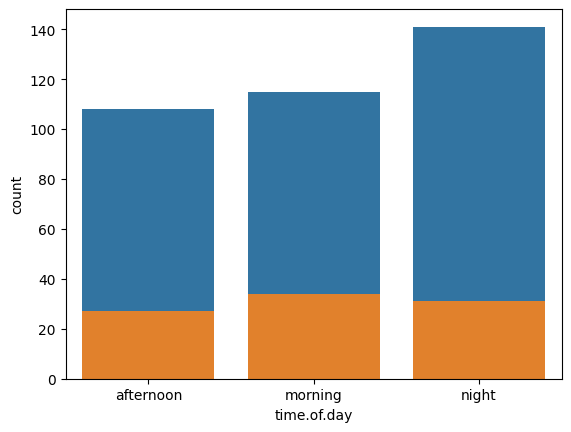

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
X_train["time.of.day"] = X_train["time.of.day"].replace("morni7ng", "morning")

sns.countplot(x = "time.of.day", data = X_train)
plt.title  = ("Count-Time of day")
plt.xlabel = ("time.of.day")
plt.ylabel = ("count")
plt.show

X_test["time.of.day"] = X_test["time.of.day"].replace("morni7ng", "morning")
sns.countplot(x = "time.of.day", data = X_test)
plt.title = ("count-time of day")
plt.xlabel = ("time.of.day")
plt.ylabel = ("count")
plt.show

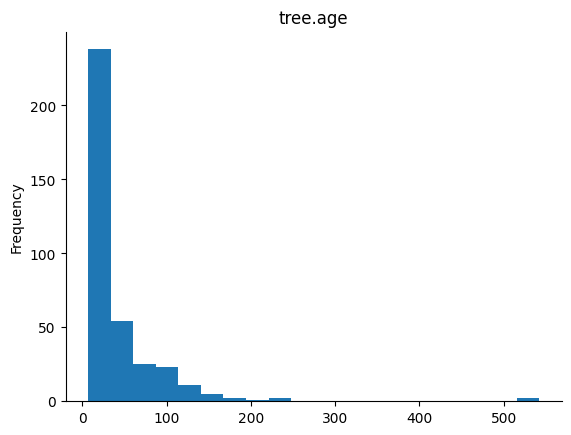

In [ ]:
from matplotlib import pyplot as plt
X_train['tree.age'].plot(kind='hist', bins=20, title='tree.age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def drop_nasty_rows(feature_names, target_names, X_data, y_data):
    """ manually deciding which feature names to include is a bit strange..
    remember to include the index variable or to change which is the index variable.
    """
    result_features = X_data.copy()  # Extract features based on feature_names
    result_target = y_data.copy()  # Copy the target data

    # Define conditions for dropping rows based on multiple columns
    bad_rows = (result_features["c.score"] > 1750) | (result_features["tree.age"] > 500)
    # Modify the conditions as needed based on the actual column names in your data

    # Filter rows based on the combined conditions
    result_features = result_features[~bad_rows]
    result_target = result_target[~bad_rows]

    return result_features, result_target

X_train, y_train = drop_nasty_rows(feature_names, target_names="target", X_data=X_train, y_data=y_train)

# Reset indexes of the cleaned data
X_train_clean = X_train.reset_index(drop=True)
y_train_clean = y_train.reset_index(drop=True)

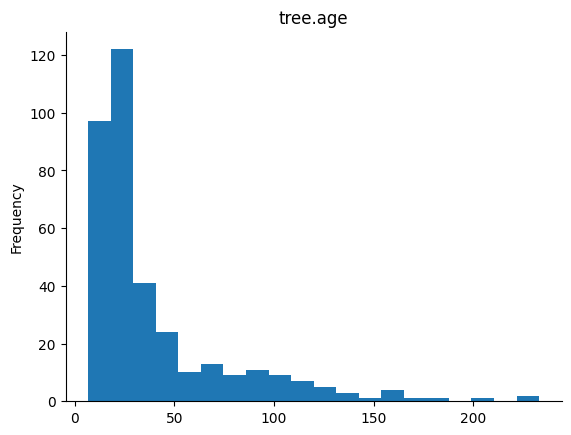

In [ ]:
from matplotlib import pyplot as plt
X_train_clean['tree.age'].plot(kind='hist', bins=20, title='tree.age')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [ ]:
from sklearn.impute import SimpleImputer
numeric_columns_train = X_train_clean.select_dtypes(include=['number']).columns
categorical_columns_train = X_train_clean.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns in training data
numeric_imputer_train = SimpleImputer(strategy='median')
X_train_clean[numeric_columns_train] = numeric_imputer_train.fit_transform(X_train_clean[numeric_columns_train])

# Impute missing values for categorical columns in training data
categorical_imputer_train = SimpleImputer(strategy='most_frequent')
X_train_clean[categorical_columns_train] = categorical_imputer_train.fit_transform(X_train_clean[categorical_columns_train])

# Identify numeric and categorical columns in test data
numeric_columns_test = X_test.select_dtypes(include=['number']).columns
categorical_columns_test = X_test.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns in test data
numeric_imputer_test = SimpleImputer(strategy='median')
X_test[numeric_columns_test] = numeric_imputer_test.fit_transform(X_test[numeric_columns_test])

# Impute missing values for categorical columns in test data
categorical_imputer_test = SimpleImputer(strategy='most_frequent')
X_test[categorical_columns_test] = categorical_imputer_test.fit_transform(X_test[categorical_columns_test])

# Check for missing values in the imputed training set
print("Missing values in X_train after imputation:")
print(X_train_clean.isnull().sum())

# Check for missing values in the imputed test set
print("\nMissing values in X_test after imputation:")
print(X_test.isnull().sum())


# Now, X_train and X_test contain imputed values without leakage from the test set

Missing values in X_train after imputation:
c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64

Missing values in X_test after imputation:
c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
dtype: int64


***NORMALIZATION AND ENCODING***

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# Define the data preparation for the columns
#
# Categorical columns will have a one hot encoder applied
#   (note - we also set this to drop the first "dummy" column, similar to what we did last week; we have also
#    told it how to handle unknown values, those that don't appear in the training data but do appear in validation
#    or testing. 'infrequent_if_exist' assigns any unknown values to a separate category)
#
# Numerical columns will be normalized
#
# Each processing step also includes the list of columns that it will be applied to
#numerical_X_train = X_train_clean.select_dtypes(include=["int64", "float64"]).columns
#categorical_X_train = X_train_clean.select_dtypes(include=["object", "bool"]).columns
numerical_X_train = ["c.score", "l.score", "rain", "tree.age", "surface.litter", "wind.intensity", "humidity", "tree.density", "month"]
categorical_X_train = ["time.of.day"]

print(numerical_X_train)
print(categorical_X_train)

t = [('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist'), categorical_X_train), ('num', MinMaxScaler(), numerical_X_train)]
col_transform = ColumnTransformer(transformers=t)

# Fit() works out which columns to make and stores them in "enc"
col_transform.fit(X_train_clean)

# Transform() then makes those columns in the data set we provide
X_train_encod = col_transform.transform(X_train_clean)
X_test_encod = col_transform.transform(X_test)  # Transform X_test as well

# X_train_encoded and X_test_encoded will now be numpy arrays, which can be used for training and testing
# The columns in these are the transformed data
train_view = pd.DataFrame(X_train_encod)
test_view = pd.DataFrame(X_test_encod)

train_view.head(10)
test_view.head(10)


['c.score', 'l.score', 'rain', 'tree.age', 'surface.litter', 'wind.intensity', 'humidity', 'tree.density', 'month']
['time.of.day']


,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.323583,0.104969,0.325845,0.114272,0.405766,0.496074,0.961538,0.254536,1.000000
1,1.0,0.0,0.349276,0.066419,0.213917,0.101849,0.458704,0.347169,0.923077,0.360137,0.000000
2,0.0,0.0,0.242552,0.101035,0.156163,0.064802,0.360923,0.462880,0.865385,0.391065,0.909091
3,1.0,0.0,0.232176,0.063575,0.155666,0.091813,0.372712,0.550906,0.961538,0.337285,0.000000
4,0.0,0.0,0.265774,0.090989,0.186133,0.062547,0.387884,0.391139,0.903846,0.414089,0.727273
5,1.0,0.0,0.326548,0.060371,0.106461,0.088232,0.436064,0.187592,0.942308,0.212680,0.454545
6,0.0,0.0,0.504422,0.141531,0.324404,0.170727,0.701561,0.574573,0.903846,0.681787,0.636364
7,1.0,0.0,0.540985,0.085925,0.235785,0.172451,0.672710,0.398877,0.942308,0.390378,0.727273
8,0.0,1.0,0.389298,0.289018,0.441252,0.081336,0.494565,0.399582,0.769231,0.593471,0.636364
9,1.0,0.0,0.311231,0.076055,0.142346,0.037392,0.415910,0.295588,0.923077,0.315223,0.909091


In [ ]:
#Assuming you already have split data (X_train, y_train)
from imblearn.over_sampling import SMOTE
#Apply SMOTE only to the training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_encod, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Define models with default hyperparameters
decision_tree_model = DecisionTreeClassifier(random_state=37)
logistic_regression_model = LogisticRegression(random_state=37)
neural_network_model = MLPClassifier(random_state=37)

# Define hyperparameter grids
decision_tree_params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

logistic_regression_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

neural_network_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'relu'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# GridSearchCV for each model with recall scoring
decision_tree_grid = GridSearchCV(decision_tree_model, decision_tree_params, scoring=scoring, refit='recall', cv=5)
logistic_regression_grid = GridSearchCV(logistic_regression_model, logistic_regression_params, scoring=scoring, refit='recall', cv=5)
neural_network_grid = GridSearchCV(neural_network_model, neural_network_params, scoring=scoring, refit='recall', cv=5)

# Fit models
decision_tree_grid.fit(X_train_resampled, y_train_resampled)
logistic_regression_grid.fit(X_train_resampled, y_train_resampled)
neural_network_grid.fit(X_train_resampled, y_train_resampled)


# Get best models
best_decision_tree_model = decision_tree_grid.best_estimator_
best_logistic_regression_model = logistic_regression_grid.best_estimator_
best_neural_network_model = neural_network_grid.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:

# Get best hyperparameters from GridSearchCV (Cell 1)
best_decision_tree_params = decision_tree_grid.best_params_
best_logistic_regression_params = logistic_regression_grid.best_params_
best_neural_network_params = neural_network_grid.best_params_

# Train the models with best hyperparameters
best_decision_tree_model.fit(X_train_resampled, y_train_resampled)
best_logistic_regression_model.fit(X_train_resampled, y_train_resampled)
best_neural_network_model.fit(X_train_resampled, y_train_resampled)

decision_tree_predictions = best_decision_tree_model.predict(X_test_encod)
logistic_regression_predictions = best_logistic_regression_model.predict(X_test_encod)
neural_network_predictions = best_neural_network_model.predict(X_test_encod)

# Print training completion message (optional)
print("Final Training Completed!")


Final Training Completed!


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
 decision_tree_grid.best_params_


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:

 logistic_regression_grid.best_params_



{'C': 10, 'penalty': 'l2'}

In [ ]:

 neural_network_grid.best_params_


{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}

In [ ]:
 #Evaluate models
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
neural_network_accuracy = accuracy_score(y_test, neural_network_predictions)

decision_tree_precision = precision_score(y_test, decision_tree_predictions)
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions)
neural_network_precision = precision_score(y_test, neural_network_predictions)

decision_tree_recall = recall_score(y_test, decision_tree_predictions)
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions)
neural_network_recall = recall_score(y_test, neural_network_predictions)

decision_tree_f1 = f1_score(y_test, decision_tree_predictions)
logistic_regression_f1 = f1_score(y_test, logistic_regression_predictions)
neural_network_f1 = f1_score(y_test, neural_network_predictions)

decision_tree_auc = roc_auc_score(y_test, decision_tree_predictions)
logistic_regression_auc = roc_auc_score(y_test, logistic_regression_predictions)
neural_network_auc = roc_auc_score(y_test, neural_network_predictions)

# Print accuracies
print("Decision Tree Metrics:")
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1)
print("AUC:", decision_tree_auc)

print("\nLogistic Regression Metrics:")
print("Accuracy:", logistic_regression_accuracy)
print("Precision:", logistic_regression_precision)
print("Recall:", logistic_regression_recall)
print("F1 Score:", logistic_regression_f1)
print("AUC:", logistic_regression_auc)

print("\nNeural Network Metrics:")
print("Accuracy:", neural_network_accuracy)
print("Precision:", neural_network_precision)
print("Recall:", neural_network_recall)
print("F1 Score:", neural_network_f1)
print("AUC:", neural_network_auc)


Decision Tree Metrics:
Accuracy: 0.9239130434782609
Precision: 0.8974358974358975
Recall: 0.9210526315789473
F1 Score: 0.9090909090909091
AUC: 0.9234892787524366

Logistic Regression Metrics:
Accuracy: 0.8695652173913043
Precision: 0.8421052631578947
Recall: 0.8421052631578947
F1 Score: 0.8421052631578947
AUC: 0.8654970760233918

Neural Network Metrics:
Accuracy: 0.9021739130434783
Precision: 0.8717948717948718
Recall: 0.8947368421052632
F1 Score: 0.8831168831168831
AUC: 0.9010721247563354


r2: 0.5964912280701753
MSE: 0.09782608695652174
Fraction < 1min: 0.9021739130434783
Fraction < 3min: 1.0


<BarContainer object of 14 artists>

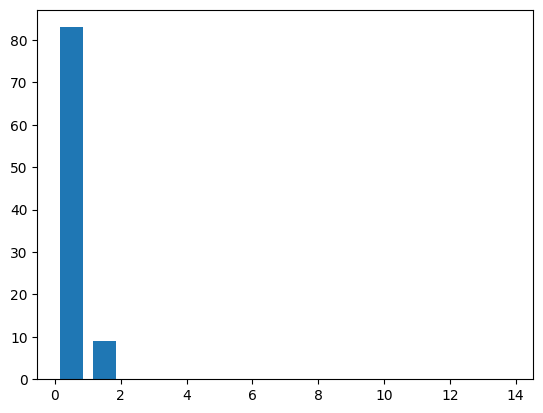

In [ ]:

from sklearn import metrics

y_pred = best_neural_network_model.predict(X_test_encod)
print("r2:", metrics.r2_score(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))


# how many under 1 min, 3 mins?
#predDifferences = abs(y_pred - y_test)
#np.where(predDifferences < 3)
predDifferences = abs(np.subtract(y_pred, y_test).ravel())
print("Fraction < 1min:", len(np.where(predDifferences < 1)[0]) / len(y_test))
print("Fraction < 3min:", len(np.where(predDifferences < 3)[0]) / len(y_test))

# distributions
hist, bins = np.histogram(predDifferences, bins=range(0,15,1))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_test) and predicted labels (e.g., decision_tree_predictions)
confusion_matrix_dt = confusion_matrix(y_test, decision_tree_predictions)
confusion_matrix_lr = confusion_matrix(y_test, logistic_regression_predictions)
confusion_matrix_nn = confusion_matrix(y_test, neural_network_predictions)

# Print the confusion matrices for each model
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix_lr)
print("Neural Network Confusion Matrix:\n", confusion_matrix_nn)


Decision Tree Confusion Matrix:
 [[50  4]
 [ 3 35]]
Logistic Regression Confusion Matrix:
 [[48  6]
 [ 6 32]]
Neural Network Confusion Matrix:
 [[49  5]
 [ 4 34]]
